### TODO
##### try without input of charge
##### setup keras cross validation


In [ ]:
#!conda install --name tf-gpu -c matplotlib pandas -y
#!conda install --name tf-gpu -c conda-forge hyperopt -y
#!conda install --name tf-gpu -c jaikumarm hyperas -y
#!conda activate

#!pip install seaborn

In [ ]:
#from __future__ import print_function
#from time import time



#from sklearn.preprocessing import RobustScaler, PowerTransformer
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.ensemble import RandomForestClassifier

#from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
#from sklearn.dummy import *

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import tensorflow as tf


import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

from __future__ import print_function
from time import time
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import RNN, BatchNormalization
from keras.datasets import imdb
import keras.layers.advanced_activations
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
#from sklearn.dummy import *
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import LSTM, Embedding
from keras.datasets import mnist
from keras.utils import np_utils
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_spblit
import tensorflow as tf

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/home/qdickinson/.local/lib/python3.5/site-packages/')
import seaborn as sns
import scipy.stats as stats

In [2]:
os.getcwd()
#os.chdir('/home/jgmeyer2/MHCpeptides/')

'/home/qdickinson/MHCpep'

In [3]:
inp = pd.read_csv("MAMU_all5.csv", header=0, low_memory=False, sep="\t")
inp.index = range(len(inp))
inp.head()

,PEPTIDE_LENGTH,PROBE_SEQUENCE,INTENSITY_A001,INTENSITY_A002,INTENSITY_A008,INTENSITY_B008,INTENSITY_B017
0,8,AAADTGHS,0.0787,0.4250,0.4201,0.3792,0.1229
1,9,AAADTGHSN,0.0063,0.4785,0.0660,0.1334,0.1069
2,10,AAADTGHSNQ,0.1408,0.7366,0.2532,0.2840,0.1879
3,8,AAAPGLGR,0.2489,0.9131,0.6756,0.8590,0.1697
4,8,AAAQHRGP,0.1525,0.3493,0.1981,0.4202,0.0338


In [4]:
inp = pd.read_csv("MAMU_all5.csv", header=0, low_memory=False, sep="\t")
inp.index = range(len(inp))
inp.head()

,PEPTIDE_LENGTH,PROBE_SEQUENCE,INTENSITY_A001,INTENSITY_A002,INTENSITY_A008,INTENSITY_B008,INTENSITY_B017
0,8,AAADTGHS,0.0787,0.4250,0.4201,0.3792,0.1229
1,9,AAADTGHSN,0.0063,0.4785,0.0660,0.1334,0.1069
2,10,AAADTGHSNQ,0.1408,0.7366,0.2532,0.2840,0.1879
3,8,AAAPGLGR,0.2489,0.9131,0.6756,0.8590,0.1697
4,8,AAAQHRGP,0.1525,0.3493,0.1981,0.4202,0.0338


### group strings that have the same first 8 characters

In [5]:
peptides = inp['PROBE_SEQUENCE'].tolist()
#peptides

In [6]:
peptides_sorted = inp['PROBE_SEQUENCE'].tolist()
peptides_sorted.sort()
#peptides_sorted


In [7]:
### get the first 8 amino acids for the 'core sequence'
first8 = [x[:8] for x in peptides]
#first8

In [8]:
print(len(first8))
print(len(set(first8)))

61066
19184


In [9]:
print(len(first8))
print(len(set(first8)))

61066
19184


In [10]:
unique_cores = set(first8)

In [11]:
### make a dict with the indexes of the positions for each of the unique core sequences
core_seqs_dict = {}
n=0
for x in list(unique_cores):
    #print(n)
    core_seqs_dict[n] = [i for i, y in enumerate(first8) if y == x ]
    n+=1

In [12]:
core_seqs_dict[202]

[59869, 59870, 59871]

In [13]:
len(inp['PROBE_SEQUENCE'])

61066

In [14]:
# are there duplicate peptides?
len(set(inp['PROBE_SEQUENCE']))

61066

In [15]:
inp['namelen']= [len(str(i)) for i in inp['PROBE_SEQUENCE']]
input1 = inp[ (inp['namelen'] >= 2) ]
#parameters, max length of sequence with
maxlen = max([len(x) for x in input1.PROBE_SEQUENCE]) ### list comprehension to get max length of sequences

## encoding sequence by index for embedding layer

In [2]:
### make vocabulary for encoding
seq = input1['PROBE_SEQUENCE']
vocab = set(''.join([str(i) for i in seq]))
vocab.add('END')  # not using END cause they are all the same length
len_vocab = len(vocab)
print(vocab)

NameError: name 'input1' is not defined

In [3]:
len_vocab

NameError: name 'len_vocab' is not defined

In [18]:
### always use alphabetical character index in the future
vocab_list = list(vocab)
vocab_list.sort()
vocab_list

['A',
 'C',
 'D',
 'E',
 'END',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [19]:
char_index = dict((vocab_list[i], i) for i in range(len(vocab_list)))
X = []
x_name = [str(i)[0:maxlen] for i in seq]
for i in x_name:
    tmp = [char_index[j] for j in str(i)]
    for k in range(0,maxlen - len(str(i))):
        tmp.append(char_index["END"])
    X.append(tmp)

In [20]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [21]:
# compare the encoding with the sequences using above dictionary
print(peptides[0:6])
print(X[0:6])

['AAADTGHS', 'AAADTGHSN', 'AAADTGHSNQ', 'AAAPGLGR', 'AAAQHRGP', 'AAAQHRGPR']
[[0, 0, 0, 2, 17, 6, 7, 16, 4, 4], [0, 0, 0, 2, 17, 6, 7, 16, 12, 4], [0, 0, 0, 2, 17, 6, 7, 16, 12, 14], [0, 0, 0, 13, 6, 10, 6, 15, 4, 4], [0, 0, 0, 14, 7, 15, 6, 13, 4, 4], [0, 0, 0, 14, 7, 15, 6, 13, 15, 4]]


In [22]:
# Create an empty list 
all_int_list =[] 
# Iterate over each row 
for index, rows in input1.iterrows(): 
    # Create list for the current row 
    my_list=[rows.INTENSITY_A001,rows.INTENSITY_A002,
             rows.INTENSITY_A008,rows.INTENSITY_B008,
             rows.INTENSITY_B017] 
    # append the list to the final list 
    all_int_list.append(my_list) 
  
# Print the list 
print(all_int_list[0]) 

[0.0787, 0.425, 0.4201, 0.3792, 0.1229]


In [23]:
#intensities = input1['INTENSITY']
np.asarray(all_int_list).shape

(61066, 5)

In [24]:
# some values are below 0
min(all_int_list)

[-0.2966, 0.1223, -0.0241, -0.0148, -0.1266]

In [62]:
# function to plot distributions of the intensity values across MHC
def pltgroup(ylabels):
    ''' only plots four histograms of y values to quickly compare distributions'''
    plt.rcParams['figure.figsize'] = [30, 5] 
    fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')
    p0 = ax1.hist(ylabels[:,0], bins=100)
    p1 = ax2.hist(ylabels[:,1], bins=100)
    p2 = ax3.hist(ylabels[:,2], bins=100)
    p3 = ax4.hist(ylabels[:,3], bins=100)
    p4 = ax5.hist(ylabels[:,4], bins=100)
    ax1.set_title("A001")
    ax2.set_title("A002")
    ax3.set_title("A008")
    ax4.set_title("B008")
    ax5.set_title("B017")
    

    plt.rc('font', size=40)          # controls default text sizes
    plt.rc('axes', titlesize=30)     # fontsize of the axes title
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
    plt.rc('legend', fontsize=30)    # legend fontsize
    plt.rc('figure', titlesize=40) 
    # Set common labels
    fig.text(0.5, -0.15, 'Intensity', ha='center', va='center')
    fig.text(0.5, 1.1, 'Testing Data', ha='center', va='center')
    fig.text(0.05, 0.5, 'Number of Examples', ha='center', va='center', rotation='vertical')

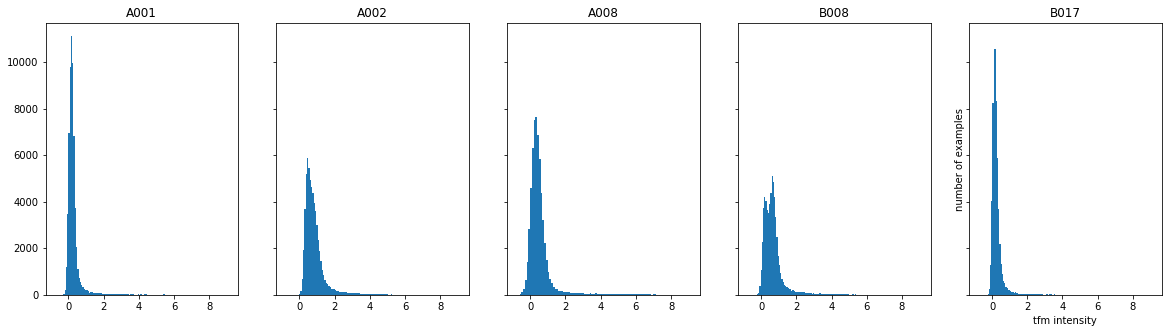

In [26]:
pltgroup(np.asarray(all_int_list))

In [27]:
X = np.asarray(X)
Y = np.asarray(all_int_list)
print(X.shape)  # regression from 10 values (max amino acid length)
print(Y.shape)  # To 5 values (each MHC complex)

(61066, 10)
(61066, 5)


In [28]:
len(core_seqs_dict)

19184

In [29]:
## train/test split based on the core 8 AA sequences
coretrainall, coretest = train_test_split(range(0, len(core_seqs_dict)), test_size=0.10, random_state=42)
# split train into train/validation
coretrain, coreval = train_test_split(coretrainall, test_size=0.20, random_state=42)

In [30]:
coretrain[0:10]

[14611, 11927, 10081, 17326, 16254, 17062, 4112, 12446, 9866, 6943]

In [31]:
print(len(coretrainall))
print(len(coretrain))
print(len(coreval))
print(len(coretest))
print(len(coretrain)+ len(coretest)+len(coreval))

17265
13812
3453
1919
19184


In [32]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coretrain]
trainindex = []
for x in tmplist:
    trainindex+=x
len(trainindex)

43923

In [33]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[x] for x in coreval]
valindex = []
for x in tmplist:
    valindex+=x
len(valindex)

10973

In [34]:
## use those indexes in the dictionary core_seq_dict to assign actual training and testing
tmplist = [core_seqs_dict[j] for j in coretest]
testindex = []
for x in tmplist:
    testindex += x
len(testindex)

6170

In [35]:
Xtrain = X[trainindex]
Xval = X[valindex]
Xtest = X[testindex]

Ytrain = Y[trainindex]
Yval = Y[valindex]
Ytest = Y[testindex]
print(len(Xtrain))
print(len(Xval))
print(len(Xtest))
print(len(Ytrain))
print(len(Yval))
print(len(Ytest))

43923
10973
6170
43923
10973
6170


In [36]:
Xtestseq = inp['PROBE_SEQUENCE'][testindex]

In [37]:
Y[testindex[0]]

array([0.0599, 0.9278, 0.4594, 0.2027, 0.2266])

In [38]:
testindex[0:10]

[24221, 24222, 24223, 16359, 16360, 16361, 32453, 32454, 32455, 19937]

In [39]:
char_index

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'END': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'K': 9,
 'L': 10,
 'M': 11,
 'N': 12,
 'P': 13,
 'Q': 14,
 'R': 15,
 'S': 16,
 'T': 17,
 'V': 18,
 'W': 19,
 'Y': 20}

In [40]:
## compare order of xtestsequence version and xtest numeric encoding
Xtestseq[0:10]

24221      KMTLTEEV
24222     KMTLTEEVQ
24223    KMTLTEEVQW
16359      GSRPKTAC
16360     GSRPKTACT
16361    GSRPKTACTN
32453      NATASNSS
32454     NATASNSSI
32455    NATASNSSII
19937      IKYERSAG
Name: PROBE_SEQUENCE, dtype: object

In [41]:
Xtest

array([[ 9, 11, 17, ..., 18,  4,  4],
       [ 9, 11, 17, ..., 18, 14,  4],
       [ 9, 11, 17, ..., 18, 14, 19],
       ...,
       [ 1, 16, 18, ..., 19,  4,  4],
       [ 1, 16, 18, ..., 19, 18,  4],
       [ 1, 16, 18, ..., 19, 18, 17]])

In [42]:
## save numpy arrays of each for the hyperas hyperparameter search loop
np.savetxt('20201230_all5_xtrain.txt', Xtrain)
np.savetxt('20201230_all5_xval.txt', Xval)
np.savetxt('20201230_all5_xtest.txt', Xtest)
np.savetxt('20201230_all5_ytrain.txt', Ytrain)
np.savetxt('20201230_all5_yval.txt', Yval)
np.savetxt('20201230_all5_ytest.txt', Ytest)

### check that the train and test sets have similar class distro

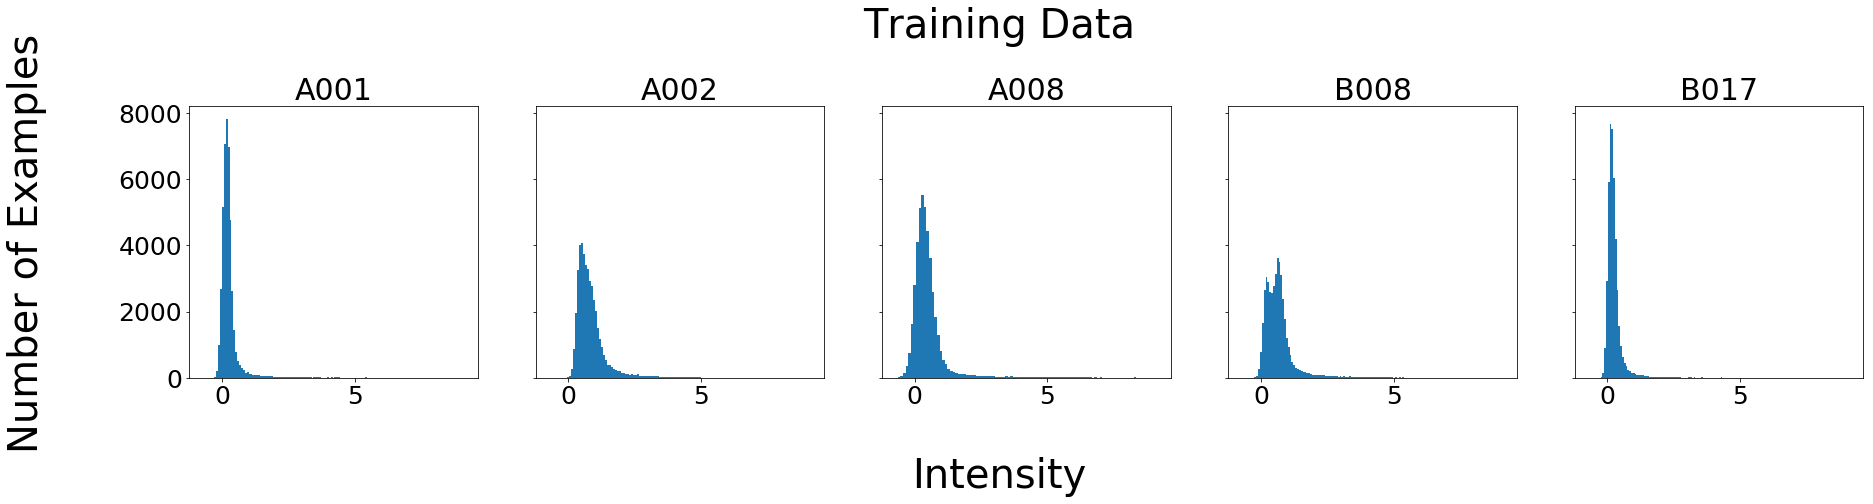

In [59]:
pltgroup(np.loadtxt('20201230_all5_ytrain.txt')) # train set

plt.savefig('ytrainhistogram.svg', bbox_inches="tight")
    
plt.show()

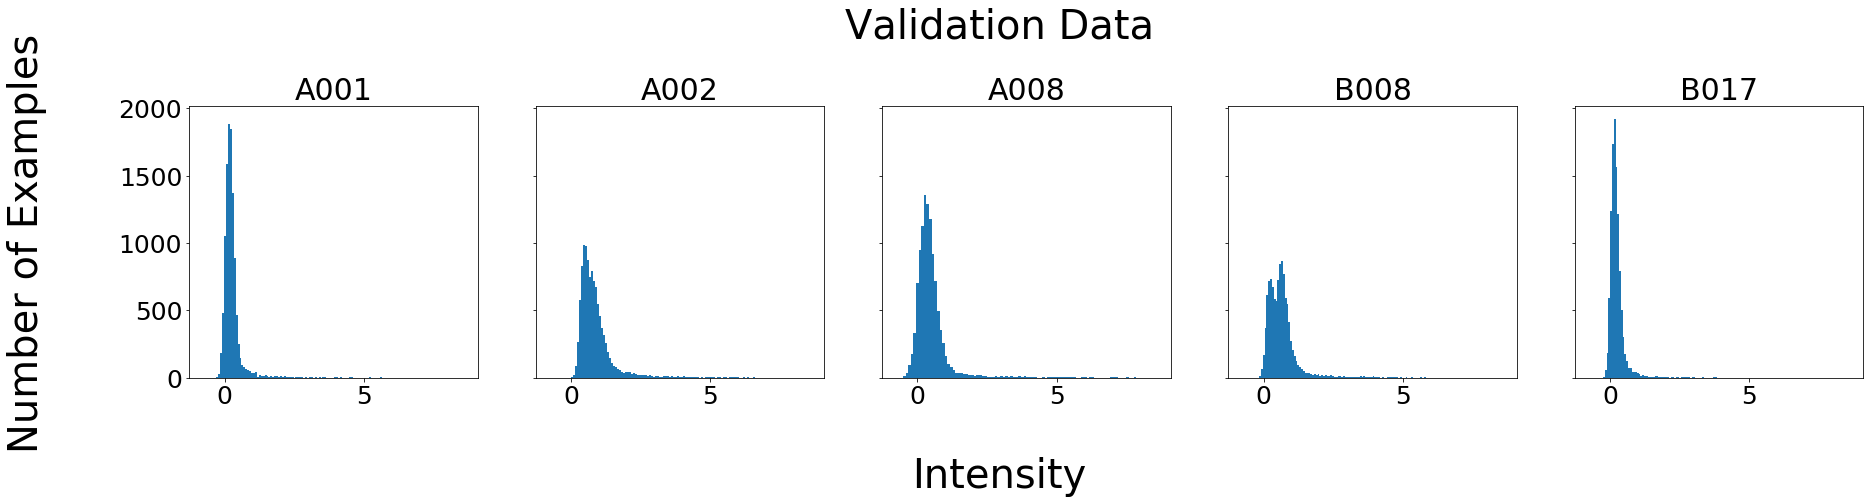

In [61]:
pltgroup(np.loadtxt('20201230_all5_yval.txt')) # validation set

plt.savefig('yvalhistogram.svg')
    
plt.show()

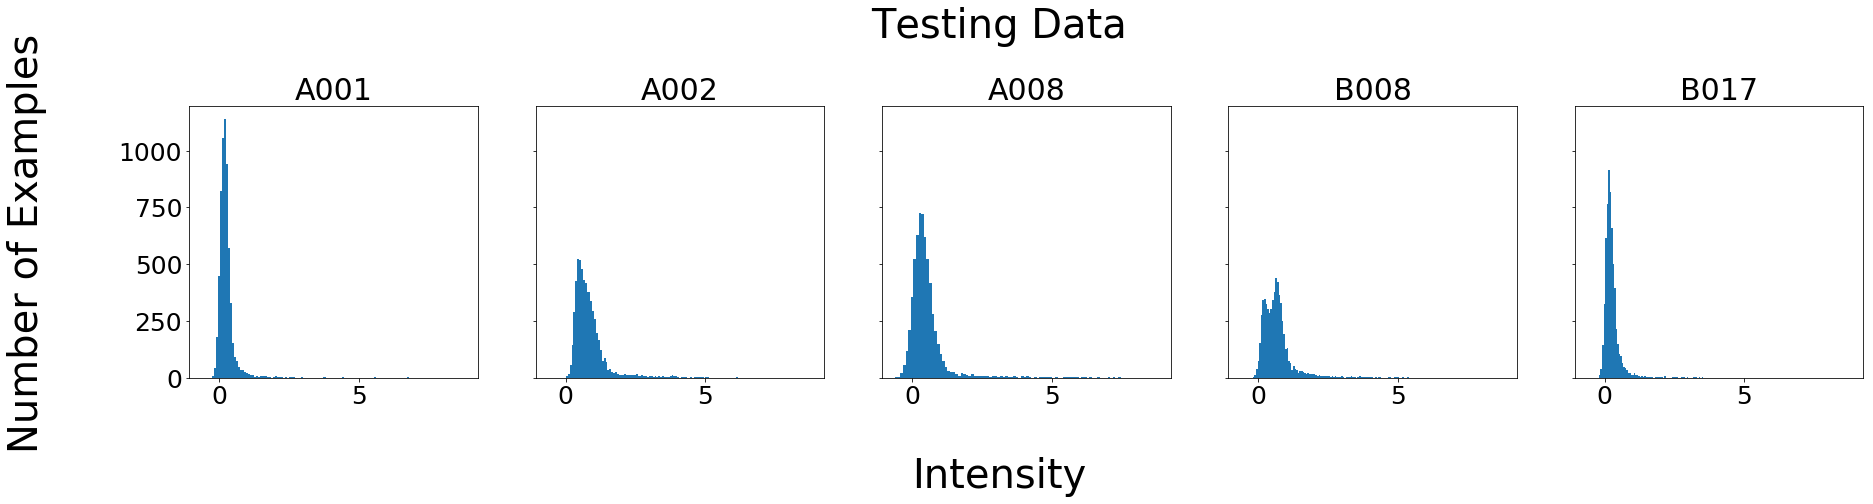

In [63]:
pltgroup(np.loadtxt('20201230_all5_ytest.txt')) # test set

plt.savefig('ytesthistogram.svg')
    
plt.show()

# quick test one parameter set showing model works

In [46]:

tf.__version__

'2.2.0'

In [64]:
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
X_train = np.loadtxt('20201230_all5_xtrain.txt')
X_val = np.loadtxt('20201230_all5_xval.txt')
Y_train = np.loadtxt('20201230_all5_ytrain.txt')
Y_val = np.loadtxt('20201230_all5_yval.txt')
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(output_dim=50 , input_dim=21, input_length=10))
model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(10,21)))
model.add(tf.keras.layers.Dropout(0.44))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(BatchNormalization())
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(5))
model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse'])

hist = model.fit(X_train, Y_train,
          batch_size=5000,
          epochs= 1000,
          verbose=2,
          validation_data=(X_val, Y_val))


Epoch 1/1000
9/9 - 2s - loss: 0.5770 - mse: 0.5770 - val_mse: 0.4341 - val_loss: 0.4341
Epoch 2/1000
9/9 - 1s - loss: 0.3989 - mse: 0.3989 - val_mse: 0.3883 - val_loss: 0.3883
Epoch 3/1000
9/9 - 1s - loss: 0.3743 - mse: 0.3743 - val_mse: 0.3617 - val_loss: 0.3617
Epoch 4/1000
9/9 - 1s - loss: 0.3559 - mse: 0.3559 - val_mse: 0.3506 - val_loss: 0.3506
Epoch 5/1000
9/9 - 1s - loss: 0.3445 - mse: 0.3445 - val_mse: 0.3438 - val_loss: 0.3438
Epoch 6/1000
9/9 - 1s - loss: 0.3399 - mse: 0.3399 - val_mse: 0.3405 - val_loss: 0.3405
Epoch 7/1000
9/9 - 1s - loss: 0.3358 - mse: 0.3358 - val_mse: 0.3345 - val_loss: 0.3345
Epoch 8/1000
9/9 - 1s - loss: 0.3268 - mse: 0.3268 - val_mse: 0.3198 - val_loss: 0.3198
Epoch 9/1000
9/9 - 1s - loss: 0.3131 - mse: 0.3131 - val_mse: 0.3091 - val_loss: 0.3091
Epoch 10/1000
9/9 - 1s - loss: 0.3014 - mse: 0.3014 - val_mse: 0.3003 - val_loss: 0.3003
Epoch 11/1000
9/9 - 1s - loss: 0.2948 - mse: 0.2948 - val_mse: 0.2967 - val_loss: 0.2967
Epoch 12/1000
9/9 - 1s - loss:

9/9 - 1s - loss: 0.0877 - mse: 0.0877 - val_mse: 0.0891 - val_loss: 0.0891
Epoch 94/1000
9/9 - 1s - loss: 0.0867 - mse: 0.0867 - val_mse: 0.0873 - val_loss: 0.0873
Epoch 95/1000
9/9 - 1s - loss: 0.0858 - mse: 0.0858 - val_mse: 0.0868 - val_loss: 0.0868
Epoch 96/1000
9/9 - 1s - loss: 0.0854 - mse: 0.0854 - val_mse: 0.0887 - val_loss: 0.0887
Epoch 97/1000
9/9 - 1s - loss: 0.0863 - mse: 0.0863 - val_mse: 0.0869 - val_loss: 0.0869
Epoch 98/1000
9/9 - 1s - loss: 0.0845 - mse: 0.0845 - val_mse: 0.0850 - val_loss: 0.0850
Epoch 99/1000
9/9 - 1s - loss: 0.0833 - mse: 0.0833 - val_mse: 0.0846 - val_loss: 0.0846
Epoch 100/1000
9/9 - 1s - loss: 0.0832 - mse: 0.0832 - val_mse: 0.0830 - val_loss: 0.0830
Epoch 101/1000
9/9 - 1s - loss: 0.0823 - mse: 0.0823 - val_mse: 0.0832 - val_loss: 0.0832
Epoch 102/1000
9/9 - 1s - loss: 0.0835 - mse: 0.0835 - val_mse: 0.0837 - val_loss: 0.0837
Epoch 103/1000
9/9 - 1s - loss: 0.0823 - mse: 0.0823 - val_mse: 0.0830 - val_loss: 0.0830
Epoch 104/1000
9/9 - 1s - loss:

Epoch 185/1000
9/9 - 1s - loss: 0.0552 - mse: 0.0552 - val_mse: 0.0620 - val_loss: 0.0620
Epoch 186/1000
9/9 - 1s - loss: 0.0550 - mse: 0.0550 - val_mse: 0.0634 - val_loss: 0.0634
Epoch 187/1000
9/9 - 1s - loss: 0.0555 - mse: 0.0555 - val_mse: 0.0623 - val_loss: 0.0623
Epoch 188/1000
9/9 - 1s - loss: 0.0547 - mse: 0.0547 - val_mse: 0.0628 - val_loss: 0.0628
Epoch 189/1000
9/9 - 1s - loss: 0.0545 - mse: 0.0545 - val_mse: 0.0622 - val_loss: 0.0622
Epoch 190/1000
9/9 - 1s - loss: 0.0555 - mse: 0.0555 - val_mse: 0.0617 - val_loss: 0.0617
Epoch 191/1000
9/9 - 1s - loss: 0.0548 - mse: 0.0548 - val_mse: 0.0614 - val_loss: 0.0614
Epoch 192/1000
9/9 - 1s - loss: 0.0543 - mse: 0.0543 - val_mse: 0.0614 - val_loss: 0.0614
Epoch 193/1000
9/9 - 1s - loss: 0.0538 - mse: 0.0538 - val_mse: 0.0609 - val_loss: 0.0609
Epoch 194/1000
9/9 - 1s - loss: 0.0534 - mse: 0.0534 - val_mse: 0.0604 - val_loss: 0.0604
Epoch 195/1000
9/9 - 1s - loss: 0.0538 - mse: 0.0538 - val_mse: 0.0617 - val_loss: 0.0617
Epoch 196/

9/9 - 1s - loss: 0.0444 - mse: 0.0444 - val_mse: 0.0542 - val_loss: 0.0542
Epoch 277/1000
9/9 - 1s - loss: 0.0445 - mse: 0.0445 - val_mse: 0.0543 - val_loss: 0.0543
Epoch 278/1000
9/9 - 1s - loss: 0.0443 - mse: 0.0443 - val_mse: 0.0545 - val_loss: 0.0545
Epoch 279/1000
9/9 - 1s - loss: 0.0447 - mse: 0.0447 - val_mse: 0.0541 - val_loss: 0.0541
Epoch 280/1000
9/9 - 1s - loss: 0.0442 - mse: 0.0442 - val_mse: 0.0544 - val_loss: 0.0544
Epoch 281/1000
9/9 - 1s - loss: 0.0441 - mse: 0.0441 - val_mse: 0.0540 - val_loss: 0.0540
Epoch 282/1000
9/9 - 1s - loss: 0.0447 - mse: 0.0447 - val_mse: 0.0546 - val_loss: 0.0546
Epoch 283/1000
9/9 - 1s - loss: 0.0437 - mse: 0.0437 - val_mse: 0.0542 - val_loss: 0.0542
Epoch 284/1000
9/9 - 1s - loss: 0.0438 - mse: 0.0438 - val_mse: 0.0537 - val_loss: 0.0537
Epoch 285/1000
9/9 - 1s - loss: 0.0439 - mse: 0.0439 - val_mse: 0.0538 - val_loss: 0.0538
Epoch 286/1000
9/9 - 1s - loss: 0.0438 - mse: 0.0438 - val_mse: 0.0540 - val_loss: 0.0540
Epoch 287/1000
9/9 - 1s -

Epoch 368/1000
9/9 - 1s - loss: 0.0389 - mse: 0.0389 - val_mse: 0.0515 - val_loss: 0.0515
Epoch 369/1000
9/9 - 1s - loss: 0.0390 - mse: 0.0390 - val_mse: 0.0512 - val_loss: 0.0512
Epoch 370/1000
9/9 - 1s - loss: 0.0390 - mse: 0.0390 - val_mse: 0.0510 - val_loss: 0.0510
Epoch 371/1000
9/9 - 1s - loss: 0.0391 - mse: 0.0391 - val_mse: 0.0515 - val_loss: 0.0515
Epoch 372/1000
9/9 - 1s - loss: 0.0388 - mse: 0.0388 - val_mse: 0.0511 - val_loss: 0.0511
Epoch 373/1000
9/9 - 1s - loss: 0.0387 - mse: 0.0387 - val_mse: 0.0514 - val_loss: 0.0514
Epoch 374/1000
9/9 - 1s - loss: 0.0387 - mse: 0.0387 - val_mse: 0.0512 - val_loss: 0.0512
Epoch 375/1000
9/9 - 1s - loss: 0.0388 - mse: 0.0388 - val_mse: 0.0513 - val_loss: 0.0513
Epoch 376/1000
9/9 - 1s - loss: 0.0389 - mse: 0.0389 - val_mse: 0.0511 - val_loss: 0.0511
Epoch 377/1000
9/9 - 1s - loss: 0.0393 - mse: 0.0393 - val_mse: 0.0515 - val_loss: 0.0515
Epoch 378/1000
9/9 - 1s - loss: 0.0390 - mse: 0.0390 - val_mse: 0.0510 - val_loss: 0.0510
Epoch 379/

9/9 - 1s - loss: 0.0359 - mse: 0.0359 - val_mse: 0.0497 - val_loss: 0.0497
Epoch 460/1000
9/9 - 1s - loss: 0.0357 - mse: 0.0357 - val_mse: 0.0496 - val_loss: 0.0496
Epoch 461/1000
9/9 - 1s - loss: 0.0359 - mse: 0.0359 - val_mse: 0.0496 - val_loss: 0.0496
Epoch 462/1000
9/9 - 1s - loss: 0.0361 - mse: 0.0361 - val_mse: 0.0500 - val_loss: 0.0500
Epoch 463/1000
9/9 - 1s - loss: 0.0359 - mse: 0.0359 - val_mse: 0.0496 - val_loss: 0.0496
Epoch 464/1000
9/9 - 1s - loss: 0.0359 - mse: 0.0359 - val_mse: 0.0495 - val_loss: 0.0495
Epoch 465/1000
9/9 - 1s - loss: 0.0357 - mse: 0.0357 - val_mse: 0.0491 - val_loss: 0.0491
Epoch 466/1000
9/9 - 1s - loss: 0.0355 - mse: 0.0355 - val_mse: 0.0496 - val_loss: 0.0496
Epoch 467/1000
9/9 - 1s - loss: 0.0355 - mse: 0.0355 - val_mse: 0.0493 - val_loss: 0.0493
Epoch 468/1000
9/9 - 1s - loss: 0.0356 - mse: 0.0356 - val_mse: 0.0493 - val_loss: 0.0493
Epoch 469/1000
9/9 - 1s - loss: 0.0354 - mse: 0.0354 - val_mse: 0.0496 - val_loss: 0.0496
Epoch 470/1000
9/9 - 1s -

Epoch 551/1000
9/9 - 1s - loss: 0.0337 - mse: 0.0337 - val_mse: 0.0487 - val_loss: 0.0487
Epoch 552/1000
9/9 - 1s - loss: 0.0337 - mse: 0.0337 - val_mse: 0.0489 - val_loss: 0.0489
Epoch 553/1000
9/9 - 1s - loss: 0.0339 - mse: 0.0339 - val_mse: 0.0492 - val_loss: 0.0492
Epoch 554/1000
9/9 - 1s - loss: 0.0341 - mse: 0.0341 - val_mse: 0.0489 - val_loss: 0.0489
Epoch 555/1000
9/9 - 1s - loss: 0.0340 - mse: 0.0340 - val_mse: 0.0485 - val_loss: 0.0485
Epoch 556/1000
9/9 - 1s - loss: 0.0337 - mse: 0.0337 - val_mse: 0.0487 - val_loss: 0.0487
Epoch 557/1000
9/9 - 1s - loss: 0.0337 - mse: 0.0337 - val_mse: 0.0489 - val_loss: 0.0489
Epoch 558/1000
9/9 - 1s - loss: 0.0338 - mse: 0.0338 - val_mse: 0.0484 - val_loss: 0.0484
Epoch 559/1000
9/9 - 1s - loss: 0.0334 - mse: 0.0334 - val_mse: 0.0483 - val_loss: 0.0483
Epoch 560/1000
9/9 - 1s - loss: 0.0333 - mse: 0.0333 - val_mse: 0.0480 - val_loss: 0.0480
Epoch 561/1000
9/9 - 1s - loss: 0.0334 - mse: 0.0334 - val_mse: 0.0486 - val_loss: 0.0486
Epoch 562/

9/9 - 1s - loss: 0.0321 - mse: 0.0321 - val_mse: 0.0482 - val_loss: 0.0482
Epoch 643/1000
9/9 - 1s - loss: 0.0321 - mse: 0.0321 - val_mse: 0.0480 - val_loss: 0.0480
Epoch 644/1000
9/9 - 1s - loss: 0.0318 - mse: 0.0318 - val_mse: 0.0481 - val_loss: 0.0481
Epoch 645/1000
9/9 - 1s - loss: 0.0319 - mse: 0.0319 - val_mse: 0.0484 - val_loss: 0.0484
Epoch 646/1000
9/9 - 1s - loss: 0.0322 - mse: 0.0322 - val_mse: 0.0485 - val_loss: 0.0485
Epoch 647/1000
9/9 - 1s - loss: 0.0321 - mse: 0.0321 - val_mse: 0.0484 - val_loss: 0.0484
Epoch 648/1000
9/9 - 1s - loss: 0.0323 - mse: 0.0323 - val_mse: 0.0476 - val_loss: 0.0476
Epoch 649/1000
9/9 - 1s - loss: 0.0320 - mse: 0.0320 - val_mse: 0.0479 - val_loss: 0.0479
Epoch 650/1000
9/9 - 1s - loss: 0.0316 - mse: 0.0316 - val_mse: 0.0488 - val_loss: 0.0488
Epoch 651/1000
9/9 - 1s - loss: 0.0320 - mse: 0.0320 - val_mse: 0.0482 - val_loss: 0.0482
Epoch 652/1000
9/9 - 1s - loss: 0.0322 - mse: 0.0322 - val_mse: 0.0484 - val_loss: 0.0484
Epoch 653/1000
9/9 - 1s -

Epoch 734/1000
9/9 - 1s - loss: 0.0306 - mse: 0.0306 - val_mse: 0.0482 - val_loss: 0.0482
Epoch 735/1000
9/9 - 1s - loss: 0.0306 - mse: 0.0306 - val_mse: 0.0479 - val_loss: 0.0479
Epoch 736/1000
9/9 - 1s - loss: 0.0307 - mse: 0.0307 - val_mse: 0.0479 - val_loss: 0.0479
Epoch 737/1000
9/9 - 1s - loss: 0.0307 - mse: 0.0307 - val_mse: 0.0486 - val_loss: 0.0486
Epoch 738/1000
9/9 - 1s - loss: 0.0303 - mse: 0.0303 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 739/1000
9/9 - 1s - loss: 0.0306 - mse: 0.0306 - val_mse: 0.0476 - val_loss: 0.0476
Epoch 740/1000
9/9 - 1s - loss: 0.0305 - mse: 0.0305 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 741/1000
9/9 - 1s - loss: 0.0304 - mse: 0.0304 - val_mse: 0.0479 - val_loss: 0.0479
Epoch 742/1000
9/9 - 1s - loss: 0.0304 - mse: 0.0304 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 743/1000
9/9 - 1s - loss: 0.0304 - mse: 0.0304 - val_mse: 0.0479 - val_loss: 0.0479
Epoch 744/1000
9/9 - 1s - loss: 0.0307 - mse: 0.0307 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 745/

9/9 - 1s - loss: 0.0298 - mse: 0.0298 - val_mse: 0.0475 - val_loss: 0.0475
Epoch 826/1000
9/9 - 1s - loss: 0.0293 - mse: 0.0293 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 827/1000
9/9 - 1s - loss: 0.0293 - mse: 0.0293 - val_mse: 0.0474 - val_loss: 0.0474
Epoch 828/1000
9/9 - 1s - loss: 0.0294 - mse: 0.0294 - val_mse: 0.0476 - val_loss: 0.0476
Epoch 829/1000
9/9 - 1s - loss: 0.0293 - mse: 0.0293 - val_mse: 0.0479 - val_loss: 0.0479
Epoch 830/1000
9/9 - 1s - loss: 0.0294 - mse: 0.0294 - val_mse: 0.0478 - val_loss: 0.0478
Epoch 831/1000
9/9 - 1s - loss: 0.0294 - mse: 0.0294 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 832/1000
9/9 - 1s - loss: 0.0296 - mse: 0.0296 - val_mse: 0.0475 - val_loss: 0.0475
Epoch 833/1000
9/9 - 1s - loss: 0.0295 - mse: 0.0295 - val_mse: 0.0478 - val_loss: 0.0478
Epoch 834/1000
9/9 - 1s - loss: 0.0297 - mse: 0.0297 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 835/1000
9/9 - 1s - loss: 0.0296 - mse: 0.0296 - val_mse: 0.0475 - val_loss: 0.0475
Epoch 836/1000
9/9 - 1s -

Epoch 917/1000
9/9 - 1s - loss: 0.0288 - mse: 0.0288 - val_mse: 0.0480 - val_loss: 0.0480
Epoch 918/1000
9/9 - 1s - loss: 0.0289 - mse: 0.0289 - val_mse: 0.0476 - val_loss: 0.0476
Epoch 919/1000
9/9 - 1s - loss: 0.0287 - mse: 0.0287 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 920/1000
9/9 - 1s - loss: 0.0288 - mse: 0.0288 - val_mse: 0.0476 - val_loss: 0.0476
Epoch 921/1000
9/9 - 1s - loss: 0.0284 - mse: 0.0284 - val_mse: 0.0474 - val_loss: 0.0474
Epoch 922/1000
9/9 - 1s - loss: 0.0285 - mse: 0.0285 - val_mse: 0.0475 - val_loss: 0.0475
Epoch 923/1000
9/9 - 1s - loss: 0.0284 - mse: 0.0284 - val_mse: 0.0477 - val_loss: 0.0477
Epoch 924/1000
9/9 - 1s - loss: 0.0284 - mse: 0.0284 - val_mse: 0.0475 - val_loss: 0.0475
Epoch 925/1000
9/9 - 1s - loss: 0.0284 - mse: 0.0284 - val_mse: 0.0471 - val_loss: 0.0471
Epoch 926/1000
9/9 - 1s - loss: 0.0286 - mse: 0.0286 - val_mse: 0.0474 - val_loss: 0.0474
Epoch 927/1000
9/9 - 1s - loss: 0.0287 - mse: 0.0287 - val_mse: 0.0474 - val_loss: 0.0474
Epoch 928/

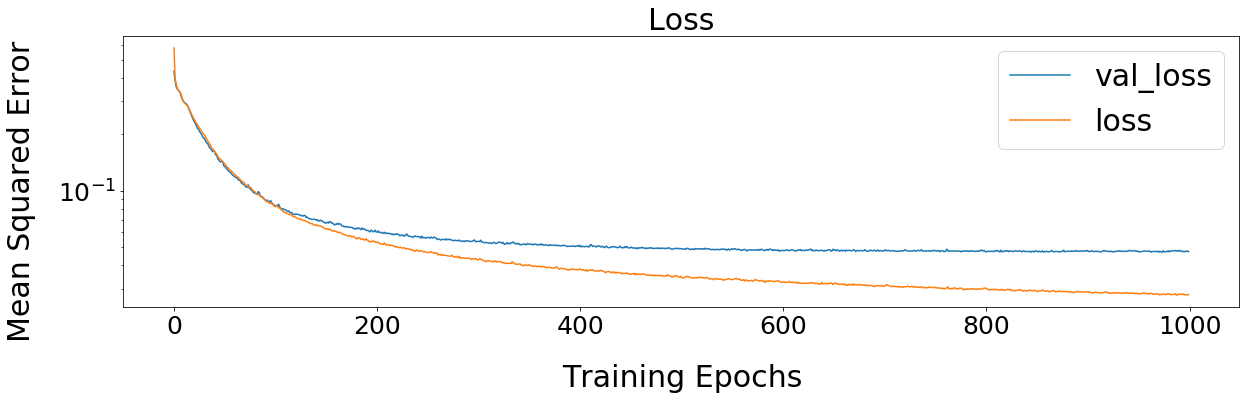

In [95]:
# plot validation and training loss to assess overfitting
plt.rcParams['figure.figsize'] = [20, 5]
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.title("Loss")
plt.rc('font', size=30)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=40)
plt.text(500, .01, 'Training Epochs', ha='center', va='center')
plt.text(-150, .1, 'Mean Squared Error', ha='center', va='center', rotation='vertical')

plt.savefig('lossplot.svg', bbox_inches="tight")
    
plt.show()

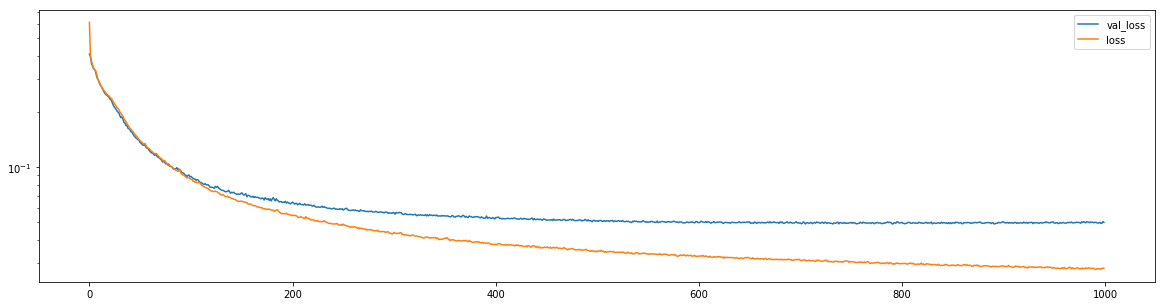

In [49]:
# without batchnorm looks similar 
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])

### trained on the raw intensity output so no need to inverse_transform 

In [50]:
model.summary() # best model architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            1050      
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0

In [51]:
model.save('20201230_MHC_all5.model') # save model for later

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 20201230_MHC_all5.model/assets


# Get model predictions, inverse transform, and compare

In [3]:
X_test = np.loadtxt('20201230_all5_xtest.txt')
y_test = np.loadtxt('20201230_all5_ytest.txt')

In [4]:
import tensorflow as tf

In [2]:
#from tensorflow.compat.v1.keras.backend import get_session
#tf.compat.v1.disable_v2_behavior()
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.pass
model = tf.keras.models.load_model('20201230_MHC_all5.model')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            1050      
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           91648     
_________________________________________________________________
dropout (Dropout)            (None, 10, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0

In [6]:
y_pred = model.predict(X_test)
#y_pred_transform = mm.inverse_transform(y_pred)

In [7]:
y_pred.shape

(6170, 5)

In [8]:
y_test.shape

(6170, 5)

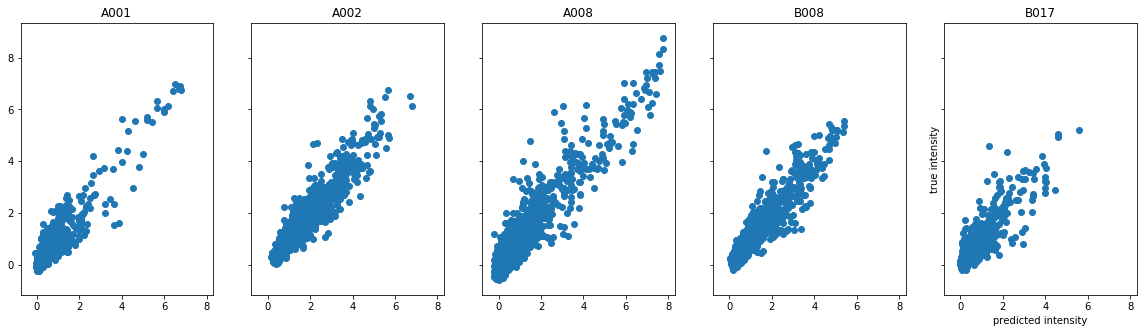

In [9]:

# wrong somehow
plt.rcParams['figure.figsize'] = [20, 5] 
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')
ax1.scatter(y_pred[:,0], y_test[:,0])
ax2.scatter(y_pred[:,1], y_test[:,1])
ax3.scatter(y_pred[:,2], y_test[:,2])
ax4.scatter(y_pred[:,3], y_test[:,3])
ax5.scatter(y_pred[:,4], y_test[:,4])
ax1.set_title("A001")
ax2.set_title("A002")
ax3.set_title("A008")
ax4.set_title("B008")
ax5.set_title("B017")
plt.xlabel("predicted intensity")
plt.ylabel("true intensity")
plt.savefig('all5_new.svg')

[[0.08332746 0.08040166 0.16006443 ... 0.26762247 0.21968722 0.21414436]
 [0.0599     0.2049     0.1151     ... 0.4421     0.1409     0.3085    ]]
SpearmanrResult(correlation=0.7555808147063515, pvalue=0.0)


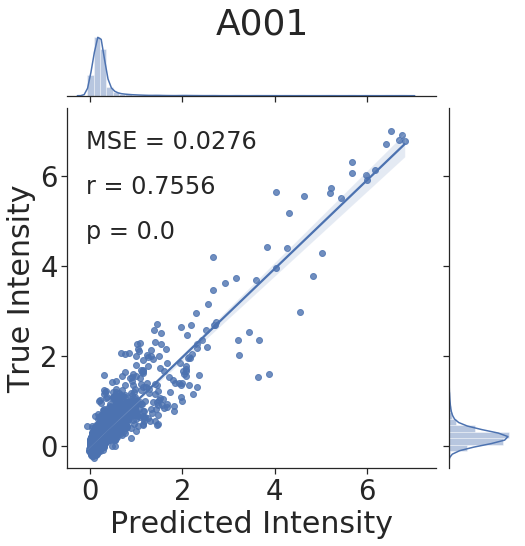

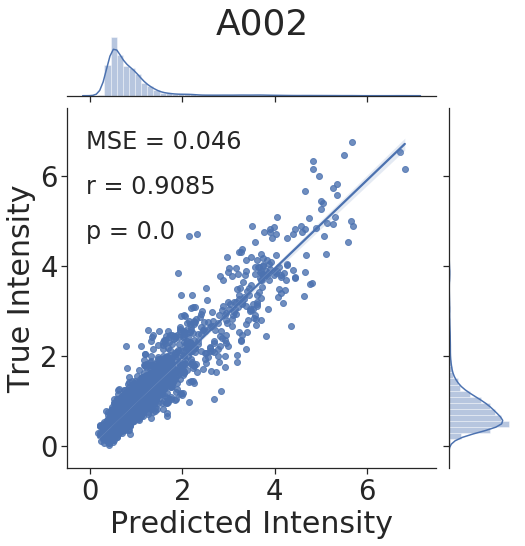

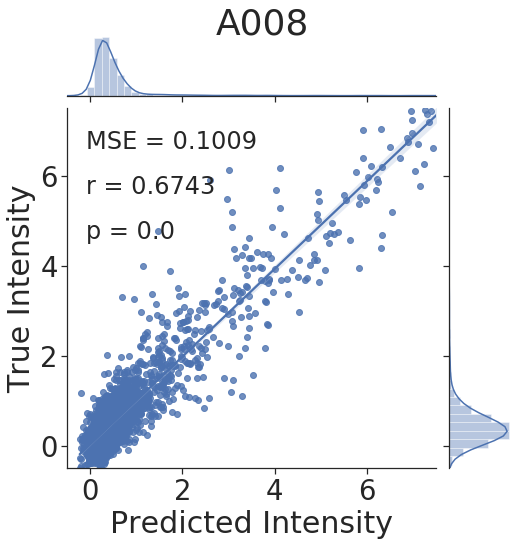

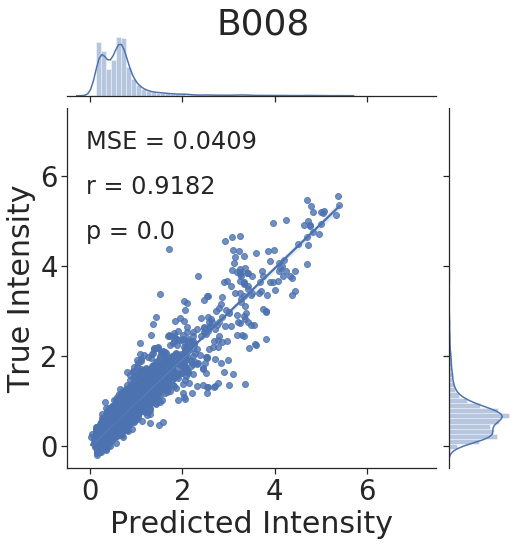

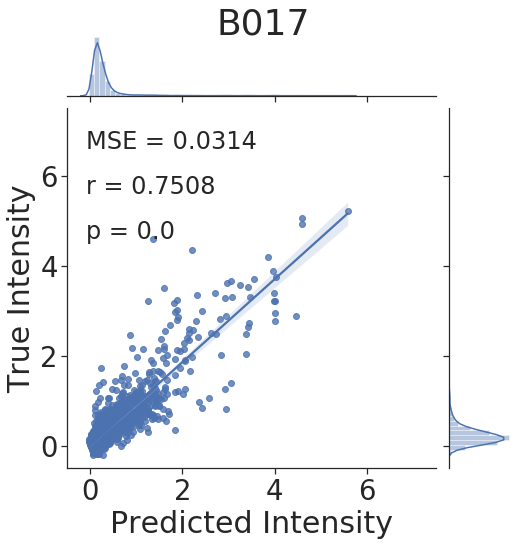

In [12]:
import sklearn
import scipy
A001 = []
A001pred = []
A002pred = []
A008pred = []
B008pred = []
B017pred = []
for value in y_pred:
    A001pred.append(value[0])
    A002pred.append(value[1])
    A008pred.append(value[2])
    B008pred.append(value[3])
    B017pred.append(value[4])
    
A001real = []
A002real = []
A008real = []
B008real = []
B017real = []
for value in y_test:
    A001real.append(value[0])
    A002real.append(value[1])
    A008real.append(value[2])
    B008real.append(value[3])
    B017real.append(value[4])
    
A001.append(A001pred)
A001.append(A001real)
print(np.asarray(A001))
dA001 = {'Predicted Intensity': A001pred, 'True Intensity': A001real}
dA002 = {'Predicted Intensity': A002pred, 'True Intensity': A002real}
dA008 = {'Predicted Intensity': A008pred, 'True Intensity': A008real}
dB008 = {'Predicted Intensity': B008pred, 'True Intensity': B008real}
dB017 = {'Predicted Intensity': B017pred, 'True Intensity': B017real}




A001df = pd.DataFrame(data =dA001)
A002df = pd.DataFrame(data =dA002)
A008df = pd.DataFrame(data =dA008)
B008df = pd.DataFrame(data =dB008)
B017df = pd.DataFrame(data =dB017)


#fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = A001df, kind='reg', height=8, xlim = (-0.5,7.5), ylim = (-0.5,7.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("A001")
prA001, pA001 = scipy.stats.spearmanr(A001pred, A001real)
print(scipy.stats.spearmanr(A001pred, A001real))
mseA001=round(sklearn.metrics.mean_squared_error(A001pred, A001real),4)
j.ax_joint.text(-.1,6.6,"MSE = " + str(mseA001), fontsize=24)
j.ax_joint.text(-.1,5.6,"r = " + str(round(prA001,4)), fontsize=24)
j.ax_joint.text(-.1,4.6,"p = " + str(pA001), fontsize=24)
plt.savefig('A001realvspredicted.png')
plt.savefig('A001realvspredicted.svg')
plt.show()

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = A002df, kind='reg', height=8, xlim = (-0.5,7.5), ylim = (-0.5,7.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("A002")
prA002, pA002 = scipy.stats.spearmanr(A002pred, A002real)
mseA002=round(sklearn.metrics.mean_squared_error(A002pred, A002real),4)
j.ax_joint.text(-.1,6.6,"MSE = " + str(mseA002), fontsize=24)
j.ax_joint.text(-.1,5.6,"r = " + str(round(prA002,4)), fontsize=24)
j.ax_joint.text(-.1,4.6,"p = " + str(pA002), fontsize=24)
plt.savefig('A002realvspredicted.png')
plt.savefig('A002realvspredicted.svg')
plt.show()

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = A008df, kind='reg', height=8, xlim = (-0.5,7.5), ylim = (-0.5,7.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("A008")
prA008, pA008 = scipy.stats.spearmanr(A008pred, A008real)
mseA008=round(sklearn.metrics.mean_squared_error(A008pred, A008real),4)
j.ax_joint.text(-.1,6.6,"MSE = " + str(mseA008), fontsize=24)
j.ax_joint.text(-.1,5.6,"r = " + str(round(prA008,4)), fontsize=24)
j.ax_joint.text(-.1,4.6,"p = " + str(pA008), fontsize=24)
plt.savefig('A008realvspredicted.png')
plt.savefig('A008realvspredicted.svg')
plt.show()

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = B008df, kind='reg', height=8, xlim = (-0.5,7.5), ylim = (-0.5,7.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("B008")
prB008, pB008 = scipy.stats.spearmanr(B008pred, B008real)
mseB008=round(sklearn.metrics.mean_squared_error(B008pred, B008real),4)
j.ax_joint.text(-.1,6.6,"MSE = " + str(mseB008), fontsize=24)
j.ax_joint.text(-.1,5.6,"r = " + str(round(prB008,4)), fontsize=24)
j.ax_joint.text(-.1,4.6,"p = " + str(pB008), fontsize=24)
plt.savefig('B008realvspredicted.png')
plt.savefig('B008realvspredicted.svg')
plt.show()

sns.set(style="ticks", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = B017df, kind='reg', height=8, xlim = (-0.5,7.5), ylim = (-0.5,7.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("B017")
prB017, pB017 = scipy.stats.spearmanr(B017pred, B017real)
mseB017=round(sklearn.metrics.mean_squared_error(B017pred, B017real),4)
j.ax_joint.text(-.1,6.6,"MSE = " + str(mseB017), fontsize=24)
j.ax_joint.text(-.1,5.6,"r = " + str(round(prB017,4)), fontsize=24)
j.ax_joint.text(-.1,4.6,"p = " + str(pB017), fontsize=24)
plt.savefig('B017realvspredicted.png')
plt.savefig('B017realvspredicted.svg')
plt.show()


In [ ]:
sns.set(style="darkgrid", color_codes=True, font_scale=2.5)
j = sns.jointplot('Predicted Intensity', 'True Intensity', data = B017df, kind='reg', height=8, xlim = (-0.5,7.5), ylim = (-0.5,7.5))
#j.annotate(stats.pearsonr, loc = ("upper left"), fontsize=14)
j.fig.suptitle("B017")
prB017, pB017 = scipy.stats.pearsonr(B017pred, B017real)
mseB017=round(sklearn.metrics.mean_squared_error(B017pred, B017real),4)
j.ax_joint.text(-.1,6.6,"MSE = " + str(mseB017), fontsize=24)
j.ax_joint.text(-.1,5.6,"r = " + str(round(prB017,4)), fontsize=24)
j.ax_joint.text(-.1,4.6,"p = " + str(pB017), fontsize=24)
plt.show()

In [ ]:
# should look like these
plt.rcParams['figure.figsize'] = [20, 5] 
fig, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(1,5, sharex='row', sharey='row')
ax1.scatter(y_pred[:,0], y_test[:,0])
ax2.scatter(y_pred[:,1], y_test[:,1])
ax3.scatter(y_pred[:,2], y_test[:,2])
ax4.scatter(y_pred[:,3], y_test[:,3])
ax5.scatter(y_pred[:,4], y_test[:,4])
ax1.set_title("A001")
ax2.set_title("A002")
ax3.set_title("A008")
ax4.set_title("B008")
ax5.set_title("B017")
plt.xlabel("predicted intensity")
plt.ylabel("true intensity")
plt.savefig('all5_new_model_20201230.svg')

## Associate the peptide sequences back with predictions

In [ ]:
Xtestseq

In [ ]:
pred_true_df = pd.DataFrame(data = y_pred, index=Xtestseq, 
                            columns = ['A001_pred','A002_pred','A008_pred','B008_pred','B017_pred', ])

In [ ]:
pred_true_df

In [ ]:
ytest_trsfm = mm.inverse_transform(Ytest)

In [ ]:
pred_true_df['A001_true'] = Ytest[:,0]
pred_true_df['A002_true'] = Ytest[:,1]
pred_true_df['A008_true'] = Ytest[:,2]
pred_true_df['B008_true'] = Ytest[:,3]
pred_true_df['B017_true'] = Ytest[:,4]

In [ ]:
pred_true_df

In [ ]:
pred_true_df.to_csv('final_pred_true_all5.csv' , sep=',')

# load model and predict - for new sequences

In [ ]:
from keras.models import load_model
model4 = load_model('MHC_10mer4mhc_raw_hyperas100_4.model')

In [ ]:
## load new data
zika = pd.read_csv('Data/zikaFP_peptides.txt', header=None)
zika.head()
zika.values[0]

In [ ]:
len(list(zika.values[0].tolist()[0]))

In [ ]:
z10 = [x.tolist()[0] for x in zika.values if len(list(x.tolist()[0]))==10]
z10

In [ ]:
# prep for embedding layer
char_index = dict((c, i) for i, c in enumerate(vocab))
z = []
z_name = [str(i)[0:maxlen] for i in z10]
for i in z_name:
  tmp = [char_index[j] for j in str(i)]
  for k in range(0,maxlen - len(str(i))):
      tmp.append(char_index["END"])
  z.append(tmp)

In [ ]:
z

In [ ]:
len(z)

In [ ]:
len(zika.values[0].tolist())

In [ ]:
np.asarray(z)

In [ ]:
y_z = model4.predict(np.asarray(z))

In [ ]:
y_z

In [ ]:
zika_pred = pd.DataFrame(y_z, index=z10, columns = ['B017_pred', 'B008_pred','A002_pred','A001_pred',] )

In [ ]:
zika_pred.to_csv('zika_prelim_predictions.csv', sep=',')